In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cell 2: Carregar dados
df = pd.read_csv("../data/Student_Habits.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Criar coluna "Performance" com base na nota do exame
def classificar_performance(score):
    if score >= 80:
        return "Alta"
    elif score >= 60:
        return "Média"
    else:
        return "Baixa"

df["Performance"] = df["exam_score"].apply(classificar_performance)


In [4]:
# Cell 3: Verificar dados nulos e tipos
df.info()
df.isnull().sum()

# Criar coluna "Performance" com base na nota do exame
def classificar_performance(score):
    if score >= 80:
        return "Alta"
    elif score >= 60:
        return "Média"
    else:
        return "Baixa"

df["Performance"] = df["exam_score"].apply(classificar_performance)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

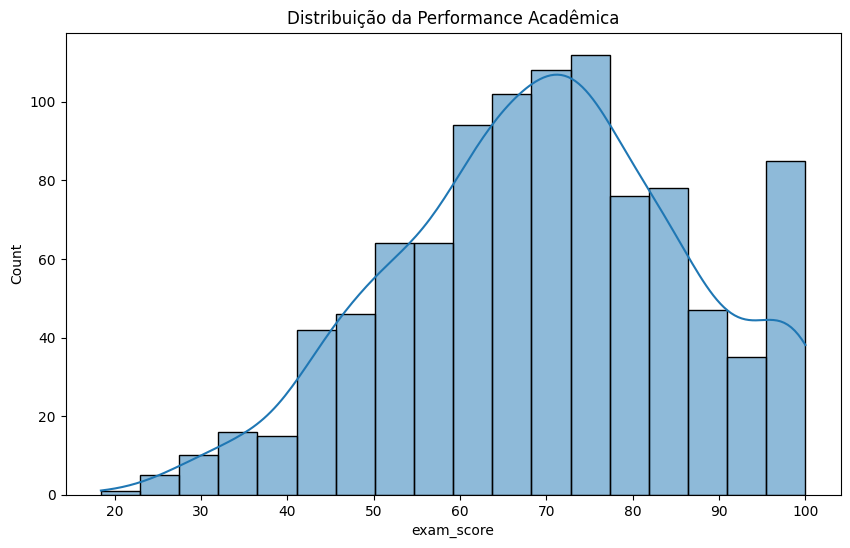

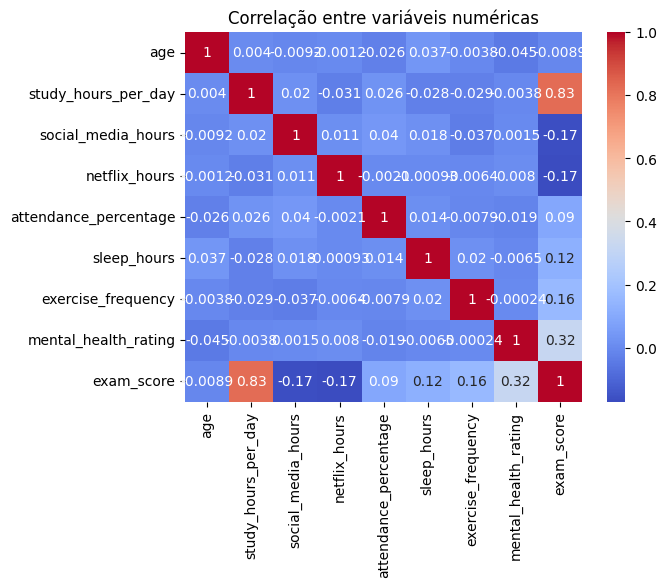

In [5]:
# Cell 4: Análise exploratória básica
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="exam_score", kde=True)
plt.title("Distribuição da Performance Acadêmica")
plt.show()

# Visualizar correlação numérica
numericas = df.select_dtypes(include=np.number)
sns.heatmap(numericas.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

In [6]:
# Cell 5: Pré-processamento
# Transformar colunas categóricas
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separar X e y
X = df.drop("Performance", axis=1)
y = df["Performance"]

# Escalonar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Cell 6: Modelo de Machine Learning
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 45   0   0]
 [  0  50   1]
 [  0   0 104]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      0.98      0.99        51
           2       0.99      1.00      1.00       104

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200

